<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [153]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [154]:

df = pd.read_csv("data.csv", sep = ",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [155]:
categorical = df.select_dtypes("object").columns.tolist()

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [156]:
df.replace("?",np.nan, inplace = True)
df.dropna(inplace = True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [158]:
X = df[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']]
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [159]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Accuracy:  0.5361858941549801
True negative: 2993
False positive: 4414
False negative: 117
True positive: 2245


Text(0.5, 1.0, 'Confusion matrix')

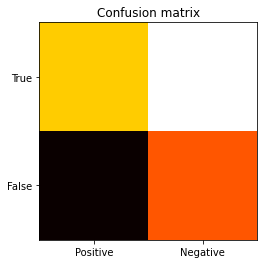

In [160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

cnfmat = confusion_matrix(y_test,y_pred)


tn, fp, fn, tp = cnfmat.ravel()
print("Accuracy: ", accuracy_score(y_test,y_pred,normalize=True))
print("True negative: "+str(tn))
print("False positive: "+str(fp))
print("False negative: "+str(fn))
print("True positive: "+str(tp))
plt.imshow(cnfmat, cmap='hot', interpolation='nearest')
plt.xticks((0,1),['Positive','Negative'])
plt.yticks((0,1),['True','False'])
plt.title('Confusion matrix')


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Accuracy:  0.2910226225816358
True negative: 534
False positive: 6873
False negative: 53
True positive: 2309


Text(0.5, 1.0, 'Confusion matrix')

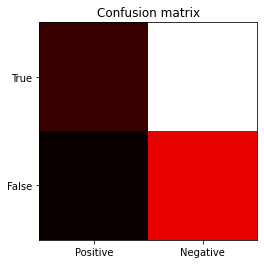

In [161]:
X = df[["race","native_country"]]
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

cnfmat = confusion_matrix(y_test,y_pred)


tn, fp, fn, tp = cnfmat.ravel()
print("Accuracy: ", accuracy_score(y_test,y_pred,normalize=True))
print("True negative: "+str(tn))
print("False positive: "+str(fp))
print("False negative: "+str(fn))
print("True positive: "+str(tp))
plt.imshow(cnfmat, cmap='hot', interpolation='nearest')
plt.xticks((0,1),['Positive','Negative'])
plt.yticks((0,1),['True','False'])
plt.title('Confusion matrix')

Predykcja z mniejszą liczbą zmiennych w klasyfikatorze Bayesowskim działa gorzej, bo zostały wybrane mniej reprezentatywne zmienne oraz mniej zmienny w ogóle. Empirycznie zostało sprawdzone, że klasyfikator Bayesowski jest w stanie położyć nacisk na bardziej znaczące zmienne.